<a href="https://colab.research.google.com/github/davidmuna/Government-Expenditure-Project/blob/master/Moringa_Data_Science_Prep_W5_Team_Project_2020_07_Team_3_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color="green">Identifying the relationship between GDP, Government Expenditure  and how they relate with the Health and Education sectors of the economy.</font>

## Step 1: Report Writing & Business Understanding






### Leah Lipesa & Molly Abisage

The government's role in economic growth has been an issue since way back with the perception that, for sustainable development and efficient output, the government's role in economic policies should be reduced. Given this fiscal scenario, there is a need to identify the relationship between GDP, Government Expenditure on the two sectors, and how they relate to growth of GDP in Kenya's economy. 


## Step 2: Data Preparation and Cleaning

### Vicky Mumo, Shirley Mbeyu & Mercy Gichuhi

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np

#Importing seaborn and matplotlib libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sb


>You can download the dataset we have used here [link](https://drive.google.com/file/d/1LT5GKjXRxBNy2XBiW0mJiKNGe0JTNJoC/view)

>You can view the description for the dataset here [link](https://docs.google.com/document/d/19OWZomN31E_A8gDmJAj7pXP_4lFjZusuhjx371eHm3A/edit) 

In [ ]:
#loading the dataset file to our environment
df = pd.read_excel('gdp_dataset.xlsx')
df.head(3)

,Indicator Name,Expenditure on secondary education (% of government expenditure on education),Current health expenditure per capita (current US$),"Government expenditure on education, total (% of government expenditure)",Current health expenditure (% of GDP),Tax revenue (% of GDP),"Revenue, excluding grants (% of GDP)","IBRD loans and IDA credits (DOD, current US$)",Population growth (annual %),GDP per capita growth (annual %),GDP deflator (base year varies by country),Domestic general government health expenditure (% of GDP),GDP growth (annual %),GDP (current US$),Gross national expenditure (% of GDP),GDP (current LCU)
0,2003,20.85074,25.437891,24.98009,5.169123,NaN,NaN,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000
1,2004,23.40954,27.526983,26.66815,5.344949,NaN,NaN,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000
2,2005,NaN,30.960957,27.46934,5.314364,NaN,NaN,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000


In [ ]:
df.dtypes

Indicator Name                                                                     int64
Expenditure on secondary education (% of government expenditure on education)    float64
Current health expenditure per capita (current US$)                              float64
Government expenditure on education, total (% of government expenditure)         float64
Current health expenditure (% of GDP)                                            float64
Tax revenue (% of GDP)                                                           float64
Revenue, excluding grants (% of GDP)                                             float64
IBRD loans and IDA credits (DOD, current US$)                                    float64
Population growth (annual %)                                                     float64
GDP per capita growth (annual %)                                                 float64
GDP deflator (base year varies by country)                                       float64
Domestic general gove

In [ ]:
#changing the column names
df.columns=['year','expe_education_%expe','health_expe_/capita','total_education_expe','health_expe_%gdp','tax_revenue_%gdp','revenue_excl_grants_%gdp','ibrd_and_ida','population_growth_annual%','gdp_growth_/capita_%gdp','gdp deflator','domestic_health_expenditure_%gdp','gdp_growth_annual%','gdp_current_us$','gross_nat_expe_%gdp','gdp_current_lcu']
df.head(3)

,year,expe_education_%expe,health_expe_/capita,total_education_expe,health_expe_%gdp,tax_revenue_%gdp,revenue_excl_grants_%gdp,ibrd_and_ida,population_growth_annual%,gdp_growth_/capita_%gdp,gdp deflator,domestic_health_expenditure_%gdp,gdp_growth_annual%,gdp_current_us$,gross_nat_expe_%gdp,gdp_current_lcu
0,2003,20.85074,25.437891,24.98009,5.169123,NaN,NaN,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000
1,2004,23.40954,27.526983,26.66815,5.344949,NaN,NaN,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000
2,2005,NaN,30.960957,27.46934,5.314364,NaN,NaN,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000


In [ ]:
#checking for any null values
df.isnull().sum()

year                                 0
expe_education_%expe                 9
health_expe_/capita                  2
total_education_expe                 4
health_expe_%gdp                     2
tax_revenue_%gdp                    12
revenue_excl_grants_%gdp            12
ibrd_and_ida                         1
population_growth_annual%            0
gdp_growth_/capita_%gdp              0
gdp deflator                         0
domestic_health_expenditure_%gdp     2
gdp_growth_annual%                   0
gdp_current_us$                      0
gross_nat_expe_%gdp                  0
gdp_current_lcu                      0
dtype: int64

In [ ]:
#cleaning up the missing values by backfilling and interpolation.
df['tax_revenue_%gdp'].fillna(method='bfill',inplace=True)
df['revenue_excl_grants_%gdp'].fillna(method='bfill',inplace=True)
df = df.interpolate()
df.head(3)

,year,expe_education_%expe,health_expe_/capita,total_education_expe,health_expe_%gdp,tax_revenue_%gdp,revenue_excl_grants_%gdp,ibrd_and_ida,population_growth_annual%,gdp_growth_/capita_%gdp,gdp deflator,domestic_health_expenditure_%gdp,gdp_growth_annual%,gdp_current_us$,gross_nat_expe_%gdp,gdp_current_lcu
0,2003,20.850740,25.437891,24.98009,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000
1,2004,23.409540,27.526983,26.66815,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000
2,2005,22.543655,30.960957,27.46934,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000


In [ ]:
#dropping the gdp in US$ since we already have it in the local currency.
df = df.drop(columns=['gdp_current_us$'])
df.head(3)

,year,expe_education_%expe,health_expe_/capita,total_education_expe,health_expe_%gdp,tax_revenue_%gdp,revenue_excl_grants_%gdp,ibrd_and_ida,population_growth_annual%,gdp_growth_/capita_%gdp,gdp deflator,domestic_health_expenditure_%gdp,gdp_growth_annual%,gross_nat_expe_%gdp,gdp_current_lcu
0,2003,20.850740,25.437891,24.98009,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,111.732648,1131782000000
1,2004,23.409540,27.526983,26.66815,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,110.347249,1274329000000
2,2005,22.543655,30.960957,27.46934,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,110.429285,1415725000000


In [ ]:
#rounding off the data to 4 decimal places.
df = df.round(4)
df.head(3)

,year,expe_education_%expe,health_expe_/capita,total_education_expe,health_expe_%gdp,tax_revenue_%gdp,revenue_excl_grants_%gdp,ibrd_and_ida,population_growth_annual%,gdp_growth_/capita_%gdp,gdp deflator,domestic_health_expenditure_%gdp,gdp_growth_annual%,gross_nat_expe_%gdp,gdp_current_lcu
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000


In [ ]:
#Exporting our cleaned dataset
df.to_csv('new_dataset.csv', index = False)


## Step 3: Data Analysis

   Biko Mwangi, Mariam Mupa, David Muna & Maurice Kimanzi

### Research Questions:




In [ ]:
#Previewing cleaned dataset
df = pd.read_csv('new_dataset.csv')
df.head(3)

,year,expe_education_%expe,health_expe_/capita,total_education_expe,health_expe_%gdp,tax_revenue_%gdp,revenue_excl_grants_%gdp,ibrd_and_ida,population_growth_annual%,gdp_growth_/capita_%gdp,gdp deflator,domestic_health_expenditure_%gdp,gdp_growth_annual%,gross_nat_expe_%gdp,gdp_current_lcu
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000


## 1 <font color="green"> Which year did kenya experience a high GDP growth.</font>

*   From the graph below, we identified the year as 2010.




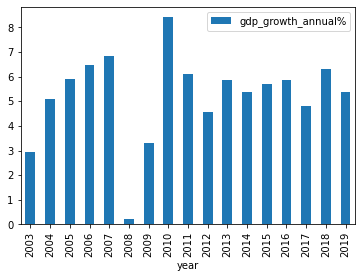

In [ ]:
#Plotting the graph
df.plot(x="year", y=["gdp_growth_annual%"], kind="bar")

## 2 <font color="green"> How does Govt. Revenue correlate with Govt. Expenditure.</font>

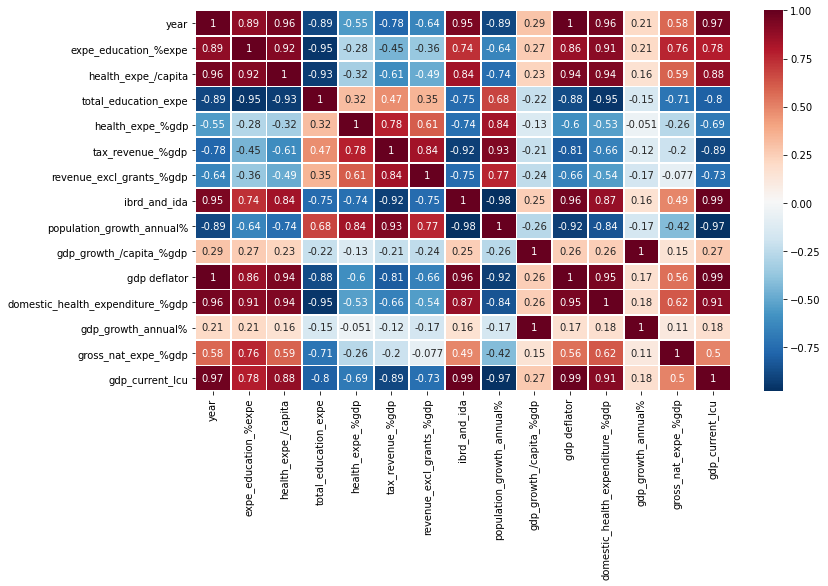

In [ ]:
#calculating the correlation between variables in the dataset using Pearson's method
df2 = df.corr(method='pearson')

#Chosing the size of the heatmap
plt.figure(figsize = (12,7)) 

#Displaying correlations using the seaborn heatmap 
sb.heatmap(df2, 
            xticklabels= df2.columns,
            yticklabels= df2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.8)

### From the correlation Matrix's coefficients above, we derive the following information;


###### <font color="green">Revenue From Taxes.</font>


*   Health Expenditure (health_expe_%gdp) has a strong correlation with Government Tax Revenue (tax_revenue_%gdp). The correlation coefficient is <font color="blue">+0.78</font> which indicates they are directly proportional.

*   Education Expenditure (total_education_expe) has a good correlation with Tax Revenue (tax_revenue_%gdp). The correlation coefficient is <font color="blue">+0.47</font> which indicates they are directly proportional but not in the same manner as with the Health sector.

###### <font color="green">Revenue From IBRD loans & IDA credits.</font>
*  Health Expenditure (health_expe_%gdp) has a strong correlation with IBRD loans & IDA credits (ibrd_and_ida). The correlation coefficient is <font color="blue">+0.74</font> which indicates they are directly proportional.

*   Education Expenditure (total_education_expe) has a significantly strong correlation with IBRD loans & IDA credits (ibrd_and_ida). The correlation coefficient is <font color="blue">+0.75</font> which indicates they are directly proportional. It also indicates that Education is mostly funded through IBRD loans & IDA credits as opposed to Government Tax Revenue.










## 3 <font color="green">Education and Health Correlation with GDP growth.</font>




*  Education Expenditure (total_education_expe) has a negative correlation with GDP growth (gdp_growth_/capita_%gdp) over the years with a coefficient of <font color="blue">-0.22</font>. This can be majorly attributed to the free education in kenya therefore leading to lower spending on education by citizens.

*  Health Expenditure(health_expe_%gdp) also has a negative correlation with GDP growth (gdp_growth_/capita_%gdp) by <font color="blue">-0.05</font> which concludes that they are inderictly proportaional. This is due to the lower overall health care spending in kenya due mainly to lower prices—including lower drug prices and lower salaries for doctors and nurses.


## 4 <font color="green">Which year had the highest expenditure on Health.</font>

In [ ]:
# finding gross national expd
df['grossnational_exp'] = df["gross_nat_expe_%gdp"] / 100 * df["gdp_current_lcu"]
df.head(3)

,year,expe_education_%expe,health_expe_/capita,total_education_expe,health_expe_%gdp,tax_revenue_%gdp,revenue_excl_grants_%gdp,ibrd_and_ida,population_growth_annual%,gdp_growth_/capita_%gdp,gdp deflator,domestic_health_expenditure_%gdp,gdp_growth_annual%,gross_nat_expe_%gdp,gdp_current_lcu,grossnational_exp
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.264569e+12
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.406186e+12
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1.563375e+12


In [ ]:
# finding total education expd
df["education_exp"] = df["total_education_expe"] / 100 * df["grossnational_exp"]
df.head(3)

,year,expe_education_%expe,health_expe_/capita,total_education_expe,health_expe_%gdp,tax_revenue_%gdp,revenue_excl_grants_%gdp,ibrd_and_ida,population_growth_annual%,gdp_growth_/capita_%gdp,gdp deflator,domestic_health_expenditure_%gdp,gdp_growth_annual%,gross_nat_expe_%gdp,gdp_current_lcu,grossnational_exp,education_exp
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.264569e+12,3.158907e+11
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.406186e+12,3.750046e+11
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1.563375e+12,4.294482e+11


In [ ]:
# finding total expenditure on health
df["health_exp"] = df["domestic_health_expenditure_%gdp"]/100 * df["gdp_current_lcu"]
df.head(3)

,year,expe_education_%expe,health_expe_/capita,total_education_expe,health_expe_%gdp,tax_revenue_%gdp,revenue_excl_grants_%gdp,ibrd_and_ida,population_growth_annual%,gdp_growth_/capita_%gdp,gdp deflator,domestic_health_expenditure_%gdp,gdp_growth_annual%,gross_nat_expe_%gdp,gdp_current_lcu,grossnational_exp,education_exp,health_exp
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.264569e+12,3.158907e+11,1.684544e+10
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.406186e+12,3.750046e+11,1.804450e+10
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1.563375e+12,4.294482e+11,2.099095e+10


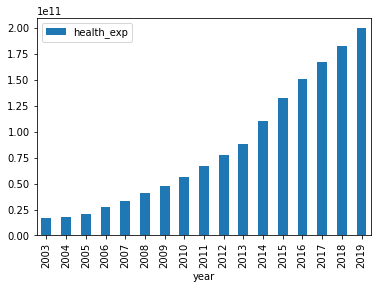

In [ ]:
# the year with the highest health expenditure
df.plot(x="year", y=["health_exp"], kind="bar")

## 5 <font color="green">Which year had the highest expenditure on Education.</font>

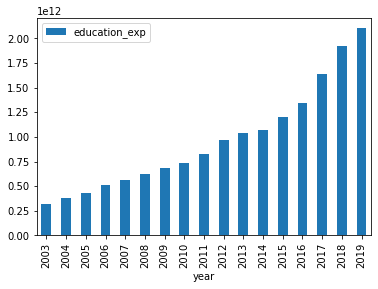

In [ ]:
# year with the highest expenditure on education
df.plot(x='year', y=['education_exp'], kind="bar")

## 6 <font color="green">How does Govt. Spending on Education & Health affect GDP growth.</font>

In [ ]:
#adding health and education expenditure
df['total_health/edu_exp'] = df['education_exp'] + df['health_exp']
df.head(3)

,year,expe_education_%expe,health_expe_/capita,total_education_expe,health_expe_%gdp,tax_revenue_%gdp,revenue_excl_grants_%gdp,ibrd_and_ida,population_growth_annual%,gdp_growth_/capita_%gdp,gdp deflator,domestic_health_expenditure_%gdp,gdp_growth_annual%,gross_nat_expe_%gdp,gdp_current_lcu,grossnational_exp,education_exp,health_exp,total_health/edu_exp
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.264569e+12,3.158907e+11,1.684544e+10,3.327362e+11
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.406186e+12,3.750046e+11,1.804450e+10,3.930491e+11
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1.563375e+12,4.294482e+11,2.099095e+10,4.504392e+11


<function matplotlib.pyplot.show>

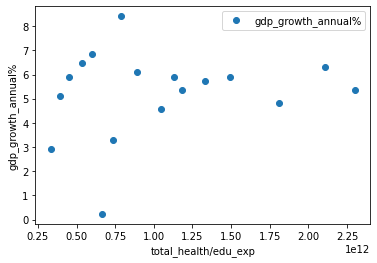

In [ ]:
#plotting total expenditure in health and education against annual gdp growth
df.plot(x= 'total_health/edu_exp', y='gdp_growth_annual%', style='o')
plt.xlabel('total_health/edu_exp')
plt.ylabel('gdp_growth_annual%')
plt.show

In [ ]:
#fitting a linear regression of gdp growth
x = pd.DataFrame(df['total_health/edu_exp'])
y = pd.DataFrame(df['gdp_growth_annual%'])
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#extracting the coefficient of total expenditure in health and education
reg.coef_

array([[5.27544021e-13]])

The results suggest that government expenditure on education and health affects gdp growth positively 

A unit increase in government expenditure leads to 5.2754e-13 unit increase in gdp growth

## Step 4: Recommendation

*The Kenyan government can ensure human capital development by; building more schools, training and employing more teachers to ensure good quality education, making education accessible for all by all and reducing the cost of education hence making it affordable and inclusive for everyone. This increases human capital development and GDP growth.*


*The Kenyan government can also continue to make more capital investments in the health sector like buying modern health equipment,building more hospitals, training more health practitioners and funding research and development in health so as to counter tropical health epidemics.*